# **0. Carga de librerías y datos**

> ## ***Librerías***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

> ## ***Carga de los datos***

In [ ]:
data = pd.read_csv('./data/airbnb-listings-extract.csv', sep = ';', decimal = '.')
data = data[data['City'] == 'Madrid'] # Filtrado por ciudad
data.dropna(subset = ['Price'], inplace = True) # No me interesan los registros nulos en el precio
data.head().T

,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Listing Url,https://www.airbnb.com/rooms/6478626,https://www.airbnb.com/rooms/4941335,https://www.airbnb.com/rooms/12510355,https://www.airbnb.com/rooms/4756811,https://www.airbnb.com/rooms/15332216
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación con baño .,Cómodo estudio en la calle Goya,Studio & Terrace - Barrio Salamanca,Cute single room -private bathroom,Deluxe Apartment in Barrio Salamanca (next to IE)
Summary,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Space,Tranquilidad y respeto del espacio room with b...,"Este estudio, regentado por Marta y Marcos, ha...","Bright and refurbished studio, located in one ...",NaN,"- Apartment of 68 square meters, modern buildi..."
Description,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Barrio muy bien comunicado , metro , autobús ,...",NaN,"The Studio is located in a quiet street, in th...",NaN,Located in the heart of Salamanca district on ...


# **1. División train-test**

In [3]:
# Preparamos los datos

train, test = train_test_split(data,test_size = 0.25)

print('Datos train: ', train.shape)
print('Datos test:  ', test.shape)

Datos train:  (9898, 89)
Datos test:   (3300, 89)


# **2. Análisis exploratorio**

> ## ***Características No Relevantes para el Análisis***

In [4]:
# Primero hago un listado de las columnas disponibles
nombre_columnas = list(train.columns.values)
print(nombre_columnas)

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

*Existen algunas columnas proporcionando datos que para mi enfoque de Machine Learning no me aportan información relevante:*

*   Información sobre la imagen: Thumbnail Url, Medium Url, Picture Url, XL Picture Url, Host Thumbnail Url, Host Picture Url.
---
*   Información sobre el host: Host ID, Host URL, Host Name, Host Location, Host About,Host Response Time, Host Response Rate, Host Acceptance Rate, Host Neighbourhood, Host Since, Host Listings Count, Host Total Listings Count, Host Verifications.
---
*   Información redundante sobre el precio: Weekly Price, Monthly Price.
---
*   Información redundante sobre la ubicación: Neighborhood Overview, Neighbourhood, Neighbourhood Cleansed, State, Zipcode, Smart Location, Country Code, Country, Latitude, Longitude, Street, City, Market, Geolocation.
---
*   Información que podría ser analizada con NLP: Name, Summary, Space, Description, Notes,Transit, Access, Interaction, House Rules,Features.
---
*   Otra información: ID, Listing Url, Scrape ID, Last Scraped, Experiences Offered,      Calendar Updated, Has Availability, Availability 30, Availability 60, Availability 90, Availability 365, Calendar last Scraped, First Review, Last Review, Review Scores Rating, Review Scores Accuracy, Review Scores Cleanliness, Review Scores Checkin, Review Scores Communication, Review Scores Location, Review Scores Value, Jurisdiction Names, Calculated host listings count, Reviews per Month, Maximum Nights, License, Cancellation Policy.

In [5]:
train.drop(['Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url',
              'Host Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location',
              'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
              'Host Neighbourhood', 'Host Since', 'Host Listings Count',
              'Host Total Listings Count', 'Host Verifications', 'Weekly Price', 'Monthly Price',
              'Neighborhood Overview', 'Neighbourhood', 'Neighbourhood Cleansed', 'Name',
              'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction',
              'House Rules', 'Features', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',
              'Experiences Offered', 'State', 'Zipcode', 'Smart Location', 'Country Code',
              'Country', 'Latitude', 'Longitude', 'Calendar Updated', 'Has Availability',
              'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
              'Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Rating',
              'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
              'Review Scores Communication', 'Review Scores Location','Review Scores Value',
              'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month',
              'Geolocation', 'Street', 'City', 'Market', 'Maximum Nights', 'License',
              'Cancellation Policy'], axis = 1, inplace = True)
train.sample(1).T

,1870
Neighbourhood Group Cleansed,Fuencarral - El Pardo
Property Type,House
Room Type,Private room
Accommodates,1
Bathrooms,1.0
Bedrooms,1.0
Beds,1.0
Bed Type,Real Bed
Amenities,"Internet,Wireless Internet,Free parking on pre..."
Square Feet,NaN


In [6]:
train.shape

(9898, 17)

> ## ***Tratamiento de datos***

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9898 entries, 2629 to 9844
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Group Cleansed  9898 non-null   object 
 1   Property Type                 9898 non-null   object 
 2   Room Type                     9898 non-null   object 
 3   Accommodates                  9898 non-null   int64  
 4   Bathrooms                     9860 non-null   float64
 5   Bedrooms                      9879 non-null   float64
 6   Beds                          9860 non-null   float64
 7   Bed Type                      9898 non-null   object 
 8   Amenities                     9819 non-null   object 
 9   Square Feet                   398 non-null    float64
 10  Price                         9898 non-null   float64
 11  Security Deposit              4262 non-null   float64
 12  Cleaning Fee                  5854 non-null   float64
 13  Guest

In [8]:
train['Square Feet'].var()

303396.55754844757

1. Dado que existen muy pocos registros en Square Feet y además su varianza es absurdamente alta, decido eliminar porque solo contaminará los datos porque de conservarlos o tratarlos, estaría introduciendo un sesgo a mi análisis.

2. Considero correcto que los lugares que no tengan registro en "Security Deposit" o "Cleaning Fee" podrían reemplazarse con un valor de 0, debido a que al ser un valor tan importante, que al Host se le olvide colocar este dato daría para muchos problemas, por tanto, valores inexistentes son 0's para mi modelo.
    
3. Los valores faltantes de "Bathrooms", "Bedrooms" y "Beds", es mejor ingresar su mediana por dos cosas:

* No tiene sentido ingresar la media y tener 3,59 baños o 1,46 camas.

* Son variables donde tienen algo de varianza y esta puede afectar en moderada medida al valor de la media.

In [9]:
train.drop('Square Feet', axis = 1, inplace = True)
train['Security Deposit'] = train['Security Deposit'].fillna(0)
train['Cleaning Fee'] = train['Cleaning Fee'].fillna(0)
train['Bathrooms'] = train['Bathrooms'].fillna(train['Bathrooms'].median())
train['Bedrooms'] = train['Bedrooms'].fillna(train['Bedrooms'].median())
train['Beds'] = train['Beds'].fillna(train['Beds'].median())

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9898 entries, 2629 to 9844
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Group Cleansed  9898 non-null   object 
 1   Property Type                 9898 non-null   object 
 2   Room Type                     9898 non-null   object 
 3   Accommodates                  9898 non-null   int64  
 4   Bathrooms                     9898 non-null   float64
 5   Bedrooms                      9898 non-null   float64
 6   Beds                          9898 non-null   float64
 7   Bed Type                      9898 non-null   object 
 8   Amenities                     9819 non-null   object 
 9   Price                         9898 non-null   float64
 10  Security Deposit              9898 non-null   float64
 11  Cleaning Fee                  9898 non-null   float64
 12  Guests Included               9898 non-null   int64  
 13  Extra

In [11]:
train.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,3.186098,1.252930,1.288846,1.985250,65.606183,78.945545,17.480905,1.565266,7.352900,3.081633,23.055264
std,1.979924,0.605458,0.821997,1.509923,55.440422,115.690588,24.609236,1.068642,10.398848,14.514256,38.353797
min,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,2.000000,52.000000,0.000000,10.000000,1.000000,0.000000,2.000000,7.000000
75%,4.000000,1.000000,2.000000,2.000000,80.000000,150.000000,30.000000,2.000000,14.000000,3.000000,28.000000
max,16.000000,8.000000,10.000000,16.000000,875.000000,990.000000,500.000000,15.000000,276.000000,1125.000000,446.000000


In [12]:
train['Minimum Nights'] = np.where(train['Minimum Nights'] > 31,
                                   train['Minimum Nights'].median(),
                                   train['Minimum Nights'])

train['Minimum Nights'].value_counts()

Minimum Nights
2.0     3499
1.0     3375
3.0     1653
4.0      409
5.0      337
7.0      236
10.0     113
6.0       74
30.0      66
15.0      47
14.0      25
20.0      19
12.0       9
28.0       9
21.0       5
8.0        4
25.0       3
9.0        3
26.0       3
13.0       3
17.0       2
24.0       1
16.0       1
29.0       1
19.0       1
Name: count, dtype: int64

<div class = 'alert alert-success'>
He decidido tratar los datos de "Minimum Nights" de esta manera, haciendo que el mínimo de noches sea como máximo un mes, puesto que, mirando los datos:
    
1. No existe un variable asociada al precio de más de un mes de renta y aunque, anteriormente la haya descartado ('Monthly Price'), lo hice porque dicha variable contiene registros insuficientes como para ser tomada en cuenta, no porque no la considere importante.
    
2. Teniendo en cuenta que hay una variable de 'Maximum Nights' y esta contiene varios registros con valores en común con esta variable de 'Minimum Nights', tomo como posibilidad que el Host al ingresar los datos, haya confundido ambas y haya puesto el valor de máximo en la casilla del mínimo.

3. Decidí usar la mediana por el motivo que expliqué anteriormente, no tendría sentido tener 4.6 noches, además, en este caso, sí hay bastantes valores que son altos y que afectan a la media
<div/>

In [13]:
train['Property Type'].value_counts()

Property Type
Apartment             8162
House                  732
Condominium            264
Bed & Breakfast        256
Loft                   214
Other                  147
Dorm                    34
Guesthouse              26
Chalet                  14
Hostel                  13
Serviced apartment      10
Townhouse                5
Boutique hotel           5
Casa particular          3
Guest suite              3
Earth House              2
Camper/RV                2
Villa                    2
Bungalow                 1
Boat                     1
Timeshare                1
Tent                     1
Name: count, dtype: int64

In [14]:
train['Property Type'] = np.where(train['Property Type'].isin(['Apartment', 'House', 'Condominium', 'Bed & Breakfast', 'Loft', 'Other']),
                                  train['Property Type'],
                                  'Other')

train['Property Type'].value_counts()

Property Type
Apartment          8162
House               732
Other               270
Condominium         264
Bed & Breakfast     256
Loft                214
Name: count, dtype: int64

In [15]:
train['Bed Type'].value_counts()

Bed Type
Real Bed         9671
Pull-out Sofa     179
Futon              31
Couch              13
Airbed              4
Name: count, dtype: int64

In [16]:
train['Bed Type'] = np.where(train['Bed Type'] == 'Real Bed',
                             train['Bed Type'],
                             'Other Bed Type')

train['Bed Type'].value_counts()

Bed Type
Real Bed          9671
Other Bed Type     227
Name: count, dtype: int64

In [17]:
train = pd.get_dummies(train, columns = ['Property Type'])
train = pd.get_dummies(train, columns = ['Room Type'])
train = pd.get_dummies(train, columns = ['Bed Type'])

In [18]:
price_mean = train.groupby('Neighbourhood Group Cleansed')['Price'].mean().to_dict()

train['Neighbourhood Group Cleansed'] = train['Neighbourhood Group Cleansed'].map(price_mean)
# Gracias profe por esta ayuda, estaba profundamente perdido del cómo poder separar los barrios jajaj c:

In [19]:
amenities_importantes = ['Air conditioning', 'Essentials', 'Free parking on premises', 'Pool', 'Wireless Internet', 'Heating', 'Gym', 'Hot tub', 'Kitchen']

# Bucle para separar las comodidades importantes, hacerlas columnas y evaluar con 1 o 0
for amenity in amenities_importantes:
    train[amenity] = train['Amenities'].fillna('').str.contains(amenity).astype(int)
train.drop('Amenities', axis=1, inplace = True)

train.sample(5)

,Neighbourhood Group Cleansed,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Condominium,Property Type_House,Property Type_Loft,Property Type_Other,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Other Bed Type,Bed Type_Real Bed,Air conditioning,Essentials,Free parking on premises,Pool,Wireless Internet,Heating,Gym,Hot tub,Kitchen
2594,49.854286,2,1.0,1.0,1.0,41.0,0.0,0.0,1,5,1.0,5,True,False,False,False,False,False,False,True,False,False,True,0,1,1,0,1,1,0,0,1
12672,72.717408,2,1.0,1.0,1.0,30.0,0.0,0.0,1,5,2.0,5,True,False,False,False,False,False,False,True,False,False,True,0,1,0,0,1,1,0,0,0
5684,45.740000,1,2.0,1.0,1.0,15.0,0.0,0.0,1,0,2.0,0,False,False,False,True,False,False,False,True,False,False,True,0,1,0,0,1,0,0,0,1
13016,73.599237,2,1.0,1.0,1.0,50.0,0.0,0.0,1,10,3.0,9,False,True,False,False,False,False,False,True,False,False,True,1,0,0,0,1,1,0,0,0
503,72.717408,2,1.0,1.0,1.0,50.0,0.0,25.0,1,0,1.0,118,True,False,False,False,False,False,True,False,False,False,True,1,1,0,1,1,1,0,0,1


> ## ***Análisis de correlación***

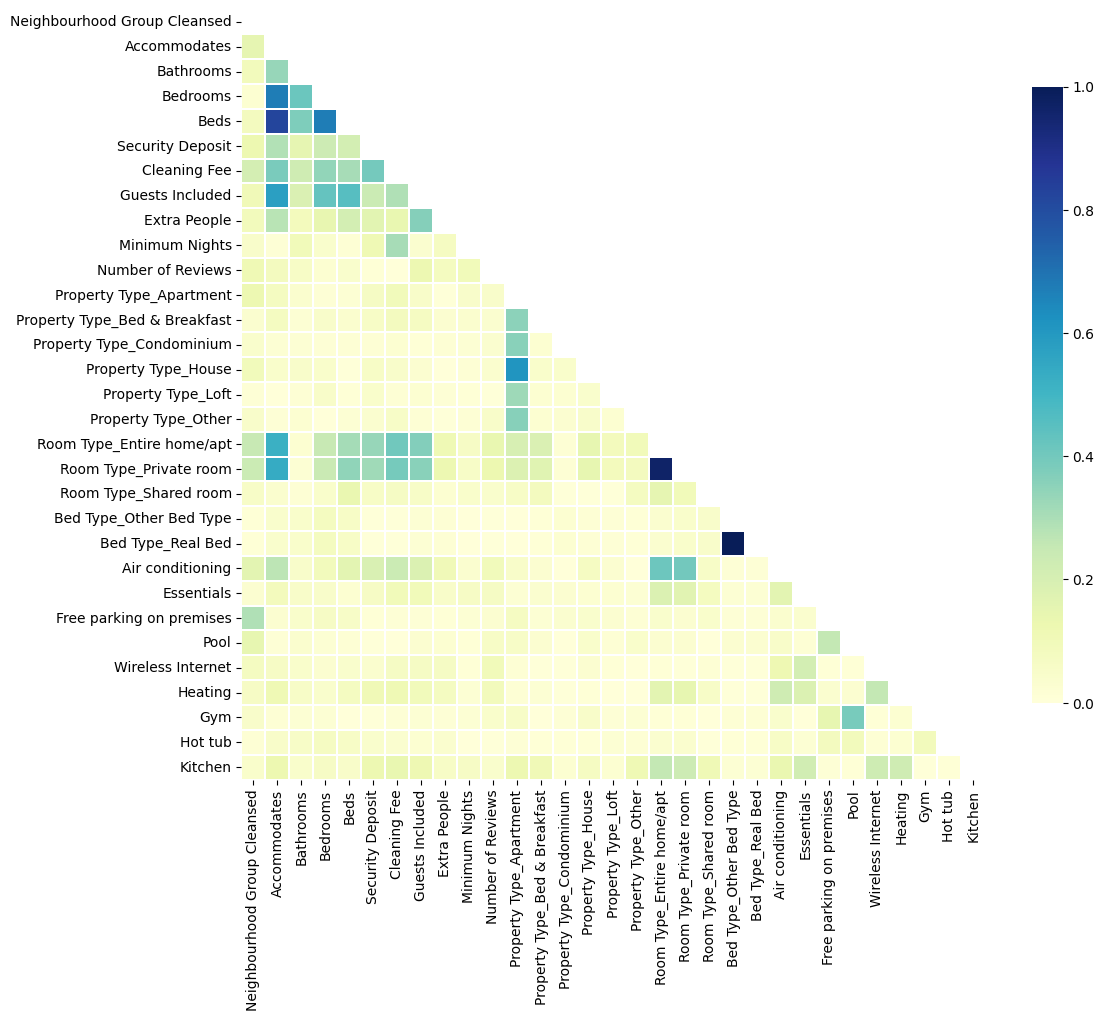

In [20]:
corr = np.abs(train.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

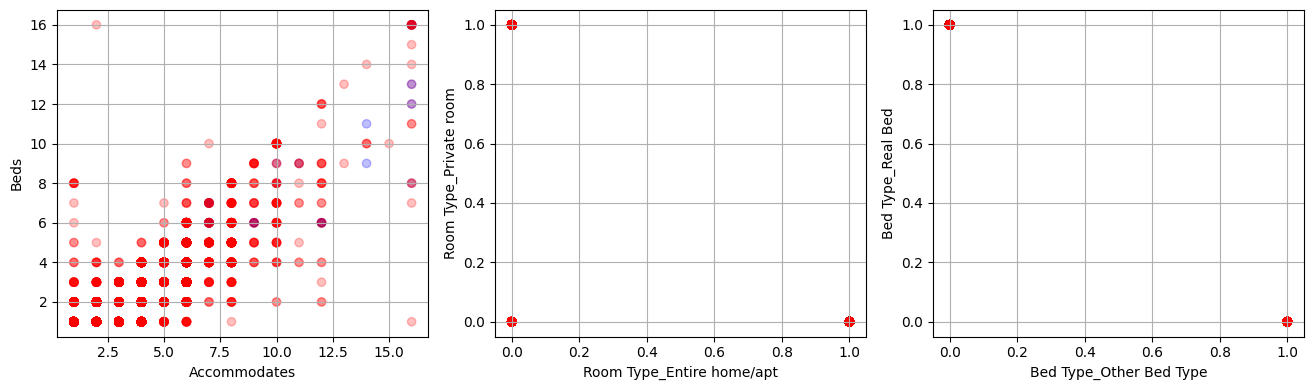

In [21]:
corr_matrix = train.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.80
pairs = np.where(upper>threshold)
fx = train.columns[pairs[0]]
fy =  train.columns[pairs[1]]

i=1
plt.figure(figsize=(22,4))
for f1,f2 in zip(fx,fy):

    plt.subplot(1,5,i)

    plt.scatter(train[f1],train[f2], c=train['Price'],cmap=cm_bright, alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()

    i+=1

plt.show()

In [22]:
train.drop('Room Type_Private room', axis = 1, inplace = True)
train.drop('Beds', axis = 1, inplace = True)

In [23]:
X_train = train.drop('Price', axis = 1)
y_train = train['Price']

print(X_train.shape, y_train.shape)

(9898, 29) (9898,)


> ## ***Preparación test***

In [24]:
test.drop(['Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url',
            'Host Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location',
            'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
            'Host Neighbourhood', 'Host Since', 'Host Listings Count',
            'Host Total Listings Count', 'Host Verifications', 'Weekly Price', 'Monthly Price',
            'Neighborhood Overview', 'Neighbourhood', 'Neighbourhood Cleansed', 'Name',
            'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction',
            'House Rules', 'Features', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',
            'Experiences Offered', 'State', 'Zipcode', 'Smart Location', 'Country Code',
            'Country', 'Latitude', 'Longitude', 'Calendar Updated', 'Has Availability',
            'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
            'Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Rating',
            'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
            'Review Scores Communication', 'Review Scores Location','Review Scores Value',
            'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month',
            'Geolocation', 'Street', 'City', 'Market', 'Maximum Nights', 'License',
            'Cancellation Policy'], axis = 1, inplace = True)

test.drop('Square Feet', axis = 1, inplace = True)
test['Security Deposit'] = test['Security Deposit'].fillna(0)
test['Cleaning Fee'] = test['Cleaning Fee'].fillna(0)
test['Bathrooms'] = test['Bathrooms'].fillna(test['Bathrooms'].median())
test['Bedrooms'] = test['Bedrooms'].fillna(test['Bedrooms'].median())
test['Beds'] = test['Beds'].fillna(test['Beds'].median())

test['Minimum Nights'] = np.where(test['Minimum Nights'] > 31,
                                  test['Minimum Nights'].median(),
                                  test['Minimum Nights'])

test['Property Type'] = np.where(test['Property Type'].isin(['Apartment', 'House', 'Condominium', 'Bed & Breakfast', 'Loft', 'Other']),
                                  test['Property Type'],
                                  'Other')

test['Bed Type'] = np.where(test['Bed Type'] == 'Real Bed',
                             test['Bed Type'],
                             'Other Bed Type')

test = pd.get_dummies(test, columns = ['Property Type'])
test = pd.get_dummies(test, columns = ['Room Type'])
test = pd.get_dummies(test, columns = ['Bed Type'])

price_mean = test.groupby('Neighbourhood Group Cleansed')['Price'].mean().to_dict()
test['Neighbourhood Group Cleansed'] = test['Neighbourhood Group Cleansed'].map(price_mean)

for amenity in amenities_importantes:
    test[amenity] = test['Amenities'].fillna('').str.contains(amenity).astype(int)
test.drop('Amenities', axis=1, inplace = True)

test.drop('Room Type_Private room', axis = 1, inplace = True)
test.drop('Beds', axis = 1, inplace = True)

X_test = test.drop('Price', axis = 1)
y_test = test['Price']

print(X_test.shape, y_test.shape)

(3300, 29) (3300,)


---

# **3. Selección de características:**

> ## *Modelo baseline - Creación de árbol de regresión*

best mean cross-validation score: 0.560
best parameters: {'max_depth': 7}


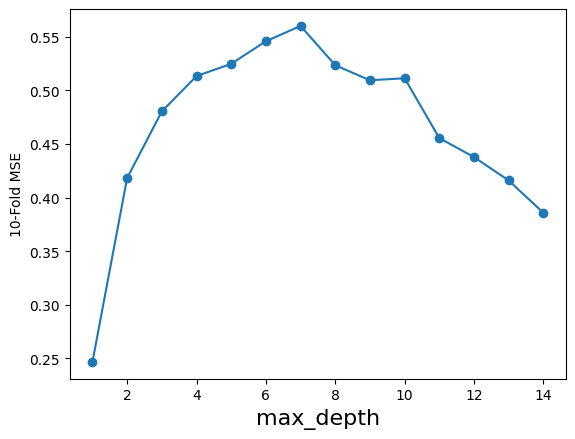

In [25]:
maxDepth_DT = range(1,15)
param_grid = {'max_depth': maxDepth_DT }

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth_DT,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [26]:
maxDepthOptimo_DT = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo_DT).fit(X_train,y_train)

y_predict = treeModel.predict(X_test)
MAE_tree = mean_absolute_error(y_test, y_predict)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))
print('Media del error en datos de test: ' + str(round(MAE_tree,2)) + ' Euros. Este resultado sirve como una Baseline para comparar con mi modelo de redes neuronales.')

Train:  0.7069297872871279
Test:  0.49597158604115144
Media del error en datos de test: 20.21 Euros. Este resultado sirve como una Baseline para comparar con mi modelo de redes neuronales.


In [27]:
nombre_columnas = X_train.columns.tolist()

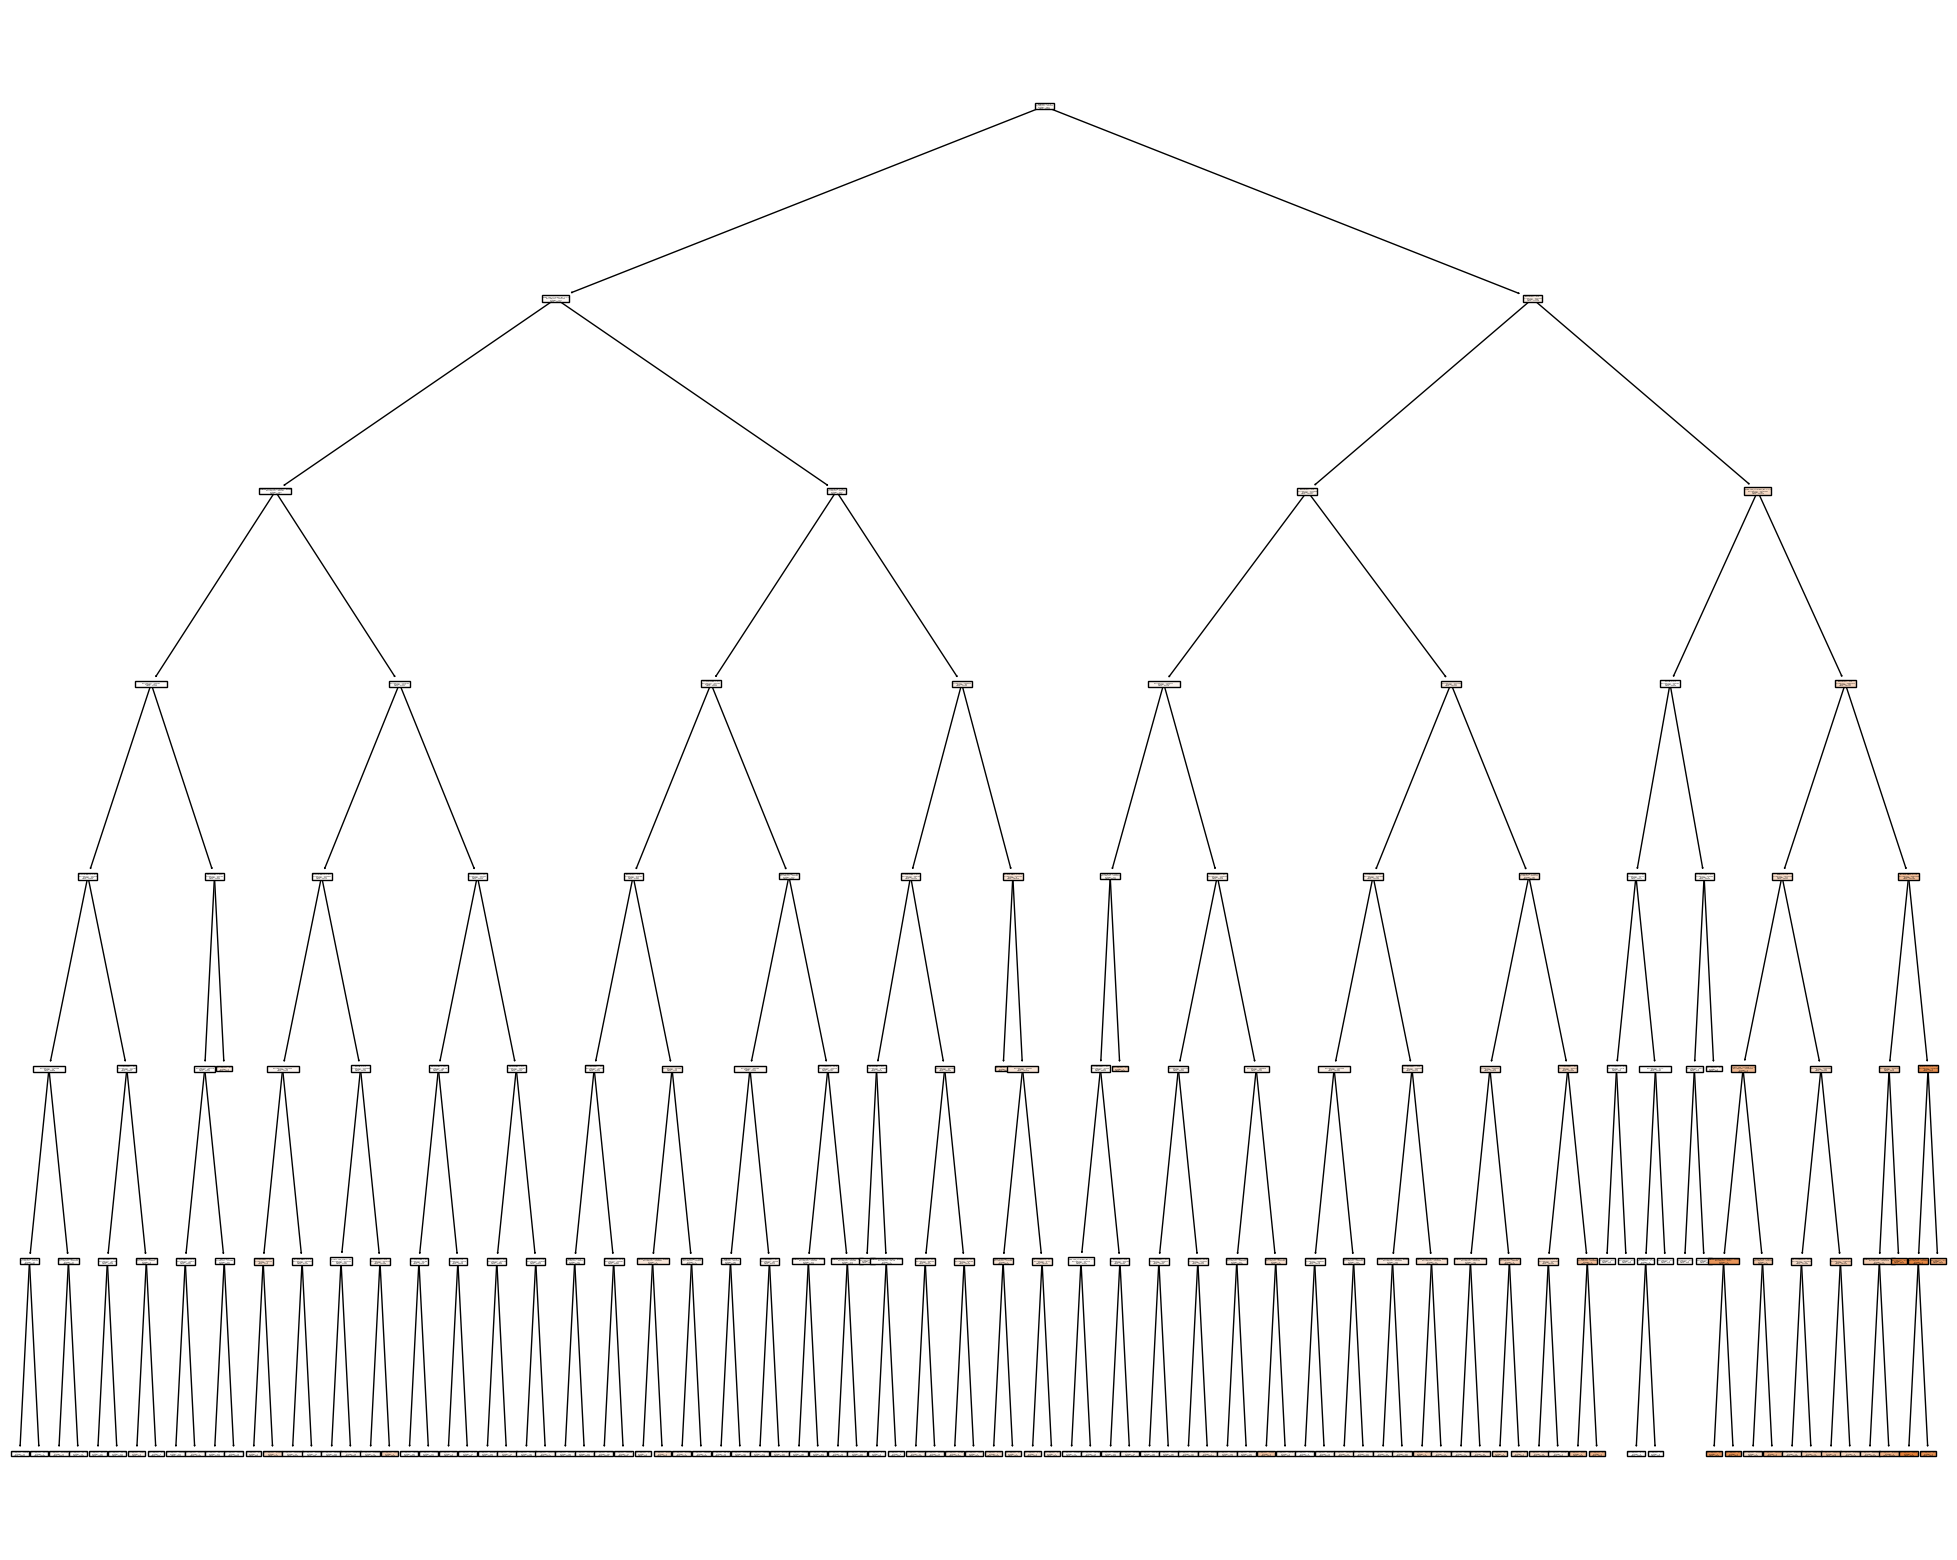

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel,
                   feature_names=nombre_columnas,
                   filled=True)

### **Primer vistazo a las características más influyentes al precio**

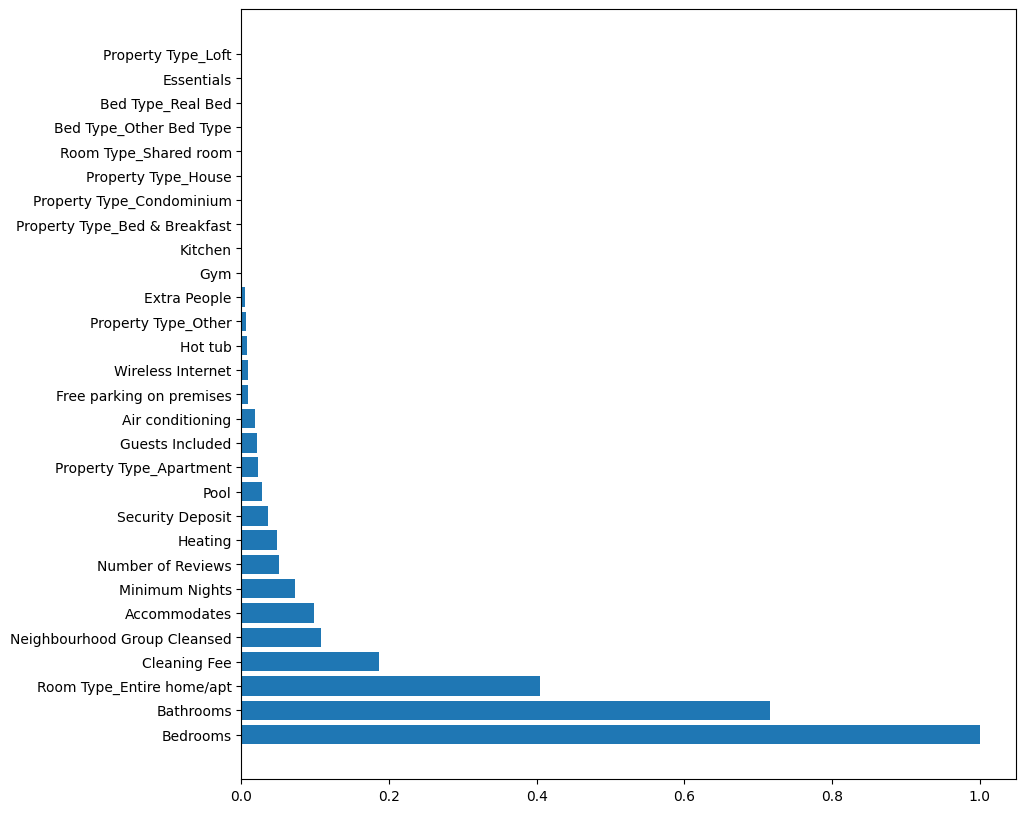

In [29]:
nombre_columnas = np.array(nombre_columnas)

importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),nombre_columnas[indices])
plt.show()

Desde luego, necesito una segunda comprobación para seleccionar de características

---

# **4. Modelo final - Creación de Random Forest**

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ......................................

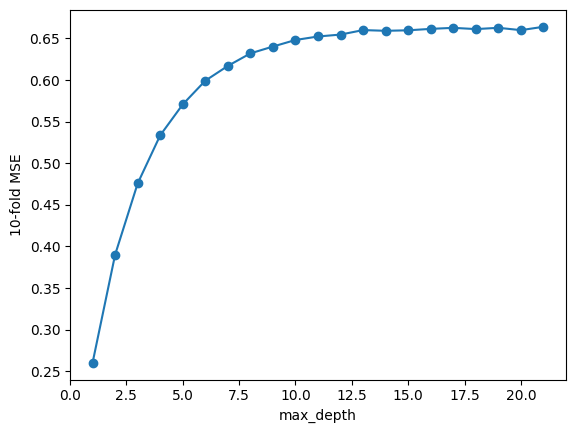

In [30]:
maxDepth_rf = range(1,22)
tuned_parameters_rf = {'max_depth': maxDepth_rf}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters_rf,cv=5, verbose=2)
grid_rf.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_rf.best_score_))
print("best parameters: {}".format(grid_rf.best_params_))

scores = np.array(grid_rf.cv_results_['mean_test_score'])
plt.plot(maxDepth_rf,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold MSE')

plt.show()

In [31]:
maxDepthOptimo = 14
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8661929692768057
Test:  0.6017519767217028


### **Segundo vistazo a las características más influyentes al precio**

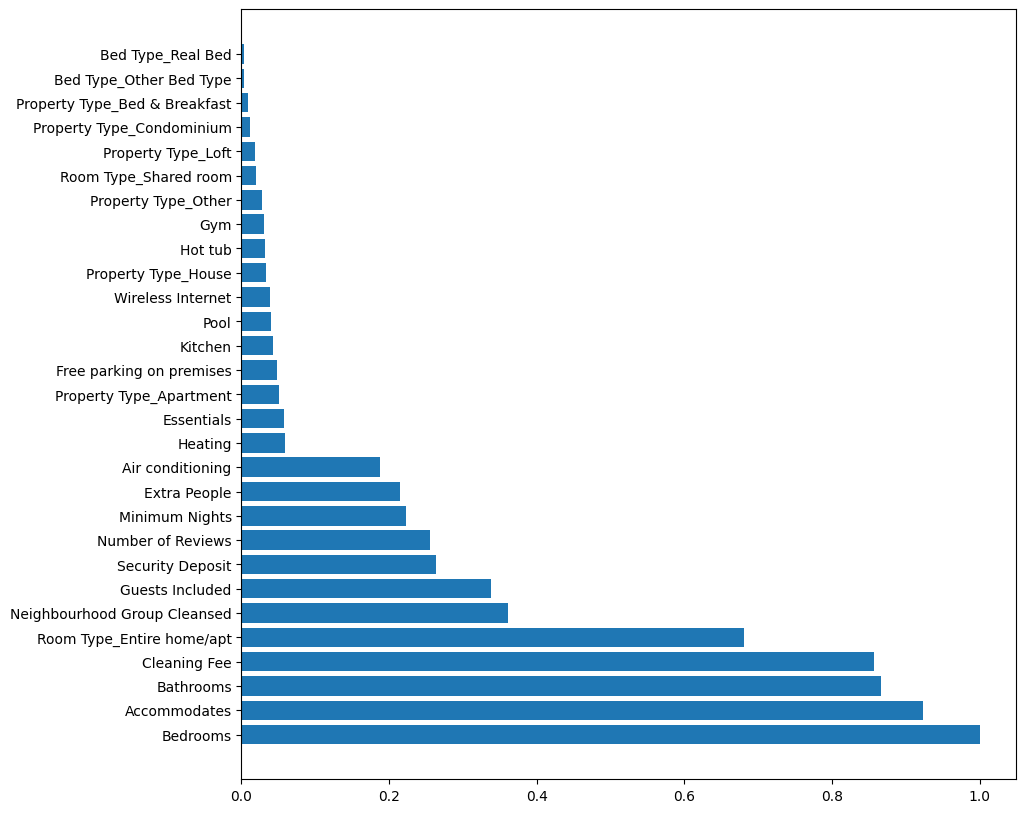

In [32]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),nombre_columnas[indices])
plt.show()

In [33]:
N,Nfeatures = X_train.shape

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):

    error_i = []

    for idxTrain, idxVal in kf.split(X_train):

        Xt = X_train.iloc[idxTrain,:]
        yt = y_train.iloc[idxTrain]
        Xv = X_train.iloc[idxVal,:]
        yv = y_train.iloc[idxVal]

        rf.fit(Xt,yt)

        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1]

        selected = indices[0:(Nfeatures-nfeatures+1)]

        Xs = Xt.iloc[:,selected]

        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv.iloc[:,selected],yv))
        error_i.append(error)

    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))

    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.6770166146112657 +/- 0.0768621397178887
# features 2 error 0.5422651465338656 +/- 0.045855011313962184
# features 3 error 0.5013579907476711 +/- 0.07809863664675516
# features 4 error 0.4275575410150214 +/- 0.037863903416432323
# features 5 error 0.4078004012204559 +/- 0.04392885921908453
# features 6 error 0.38719661698513663 +/- 0.061979123456792067
# features 7 error 0.37400077545288796 +/- 0.06780720389786926
# features 8 error 0.3655332124419931 +/- 0.05718060394212185
# features 9 error 0.3592040895575157 +/- 0.041075090278115456
# features 10 error 0.3453773685447816 +/- 0.06029999710672722
# features 11 error 0.34292903505391986 +/- 0.042613834258211886
# features 12 error 0.3279731815540592 +/- 0.05817000891944907
# features 13 error 0.33521330888575734 +/- 0.03518201238362028
# features 14 error 0.339449216895337 +/- 0.05153551658361907
# features 15 error 0.3400809838865853 +/- 0.058417101520574166
# features 16 error 0.33310257644512553 +/- 0.0619205262

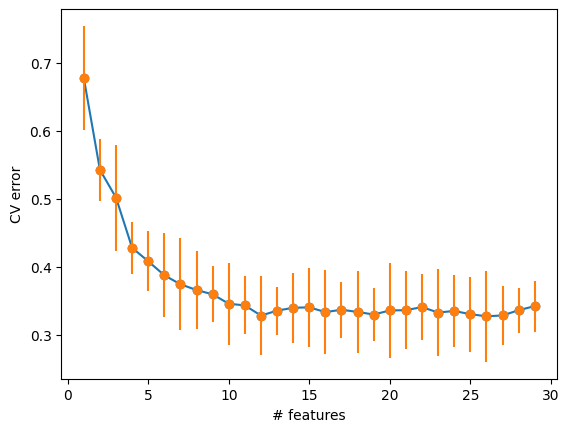

In [34]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

## **Modelo Final**

In [35]:
selected_features = indices[0:14]
maxDepthOptimo = 14

randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train.iloc[:, selected_features], y_train)

y_predict_rf = randomForest.predict(X_test.iloc[:, selected_features])
MAE_rf = mean_absolute_error(y_test, y_predict_rf)

print("Train: ",randomForest.score(X_train.iloc[:, selected_features],y_train))
print("Test: ",randomForest.score(X_test.iloc[:, selected_features],y_test))
print('Media del error en datos de test: ' + str(round(MAE_rf,2)) + ' Euros.')

Train:  0.8738858827905717
Test:  0.6097943124174408
Media del error en datos de test: 17.11 Euros.


In [36]:
for sf in selected_features:
    print(nombre_columnas[sf])

Bedrooms
Accommodates
Cleaning Fee
Bathrooms
Room Type_Entire home/apt
Neighbourhood Group Cleansed
Guests Included
Security Deposit
Number of Reviews
Minimum Nights
Air conditioning
Extra People
Heating
Essentials


# Conclusiones
1. El objetivo de la práctica es seguir las buenas prácticas enseñadas en clase, traté en la medida de lo posible seguir todos los pasos y recomendaciones. Esto fue de gran ayuda puesto que recordar que esto es un proceso iterativo me ayudó a no quedarme bloqueado.
---
2. A través del desarrollo del modelo, fui probando y cambiando características, valores y datos en general, esto, me hizo entender bastante bien los modelados de ML. Mi modelo final fue un Random Forest por su capacidad intrínseca de manejar gran cantidad de características complejas haciendo que, si bien no alcanzara resultados espectaculares, creo haber demostrado resultados y usos adecuados en las herramientas.
---
3. La selección de características desde luego no fue lo más fácil del proyecto y luego de arduo análisis, inferencias, uso de 2 modelos y conclusiones de por medio, llegué a las 14 características que considero más importantes, suficientes para dar una respuesta que por su puesto no fuera ni con un modelo muy simple ni un modelo muy complejo.
---
4. El análisis entre mi modelo baseline y mi modelo final de Random Forest revela una mejora en la precisión de las predicciones. Mientras que el modelo base registró un MAE de +/- 20 euros, mi modelo final redujo este error a +/- 15 euros. Esta reducción de aproximadamente 25% en el MAE demuestra de manera muy clara la mejora del modelo final en la predicción de valores más cercanos a los reales y también me queda clara la gran importancia de lo que es una buena selección de características. Por supuesto, es importante considerar que aunque existe mejoría entre un modelo y otro, desde luego existen las opciones para mejorar aún más, esto mediante la exploración de las otras características, implementación de otras tecnologías, el feature engineering o el fine tuning del modelo.

Herramientas/ayudas usadas:

[Target encoding](https://maxhalford.github.io/blog/target-encoding/)

[ChatGPT](https://chat.openai.com/)

[Documentación scikit-learn](https://scikit-learn.org/stable/modules/tree.html#regression)

[Documentación pandas](https://pandas.pydata.org/docs/)

Libro: Practical Statistics for Data Scientists: 50 Essential Concepts

Contenido dado en clase (notebooks)